# Imports

In [2]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import numpy as np

# Read CSV

In [4]:
df = pd.read_csv('stats_2.csv', delimiter=';')
print(df.columns.tolist())

['Uses Octree', 'Spheres', 'Max Octree Depth', 'Num Samples', 'Max Rays Depth', 'Screen Width', 'Screen Height', 'Min', 'Max', 'Avg', 'Min FPS', 'Max FPS', 'Avg FPS']


In [27]:
df_1 = pd.read_csv('stats.csv', delimiter=';')

In [5]:
# prep columns in df
df['Uses Octree'] = df['Uses Octree'].astype(int) 
df['Spheres'] = df['Spheres'].astype(int) 
df['Max Octree Depth'] = df['Max Octree Depth'].astype(int)
df['Num Samples'] = df['Num Samples'].astype(int)
df['Max Rays Depth'] = df['Max Rays Depth'].astype(int)
df['Screen Width'] = df['Screen Width'].astype(int)
df['Screen Height'] = df['Screen Height'].astype(int)
df['Min'] = df['Min'].astype(float)
df['Max'] = df['Max'].astype(float)
df['Avg'] = df['Avg'].astype(float)
df['Min FPS'] = df['Min FPS'].astype(float)
df['Max FPS'] = df['Max FPS'].astype(float)
df['Avg FPS'] = df['Avg FPS'].astype(float)

In [6]:
df_octree = df[df['Uses Octree'] == 1]
df_no_octree = df[df['Uses Octree'] == 0]
print(df_octree)

    Uses Octree  Spheres  Max Octree Depth  Num Samples  Max Rays Depth  \
3             1      500                10            4               4   
4             1      500               250            4               4   
5             1      500               500            4               4   
6             1      500              1000            4               4   
7             1     1000                10            4               4   
8             1     1000               500            4               4   
9             1     1000              1000            4               4   
10            1     1000              2000            4               4   
11            1     2000                10            4               4   
12            1     2000              1000            4               4   
13            1     2000              2000            4               4   
14            1     2000              4000            4               4   

    Screen Width  Screen

Correlation between variables and metrics:
                   Min FPS   Max FPS   Avg FPS
Spheres          -0.957207 -0.929690 -0.958193
Max Octree Depth -0.499131 -0.511891 -0.480594


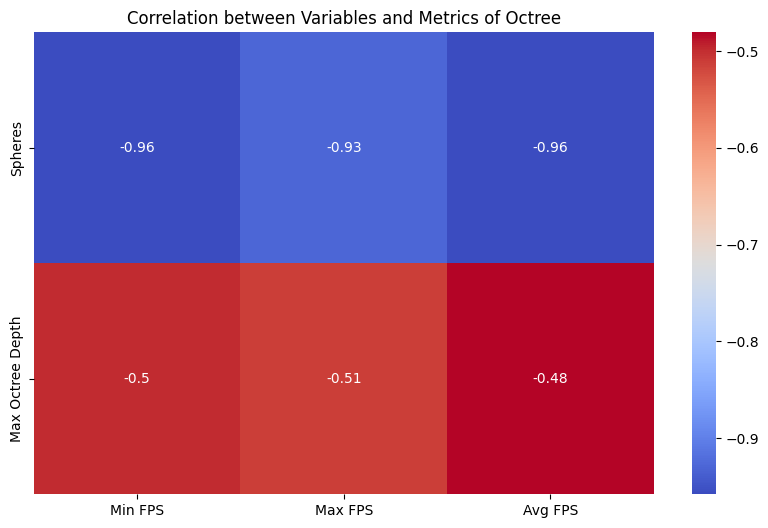

In [22]:

# Calculate the correlation matrix between the 6 variables and the 6 metrics
variables = ['Spheres', 'Max Octree Depth']
metrics = ['Min FPS', 'Max FPS', 'Avg FPS']

correlation = df_octree[variables + metrics].corr().loc[variables, metrics]
print("Correlation between variables and metrics:")
print(correlation)

# Visualize the correlation matrix as a heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Variables and Metrics of Octree')
plt.show()

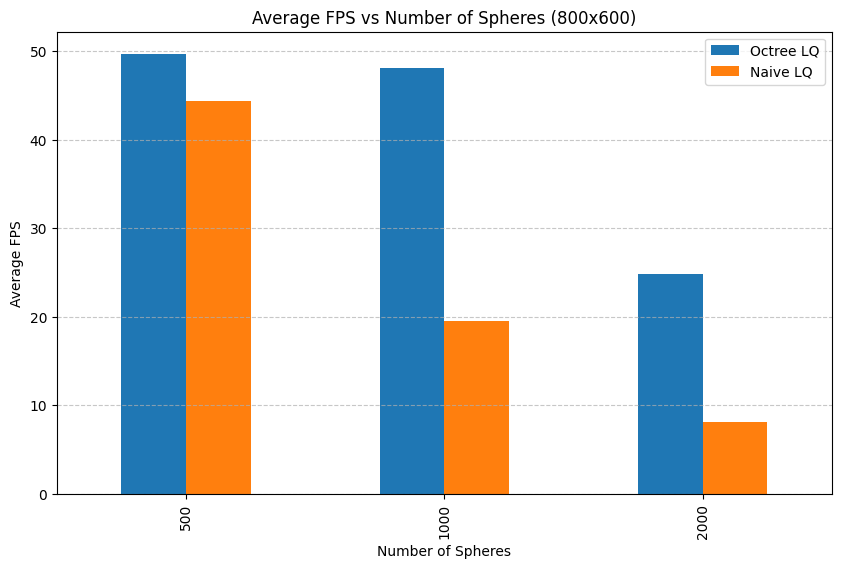

In [25]:
# Create a new DataFrame with the avg FPS for octree and no-octree
comparison_df = pd.DataFrame({
    'Octree LQ': df_octree.groupby('Spheres')['Avg FPS'].mean(),
    'Naive LQ': df_no_octree.groupby('Spheres')['Avg FPS'].mean()
})

# Plot the grouped bar chart
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Number of Spheres')
plt.ylabel('Average FPS')
plt.title('Average FPS vs Number of Spheres (800x600)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Figure size 1200x800 with 0 Axes>

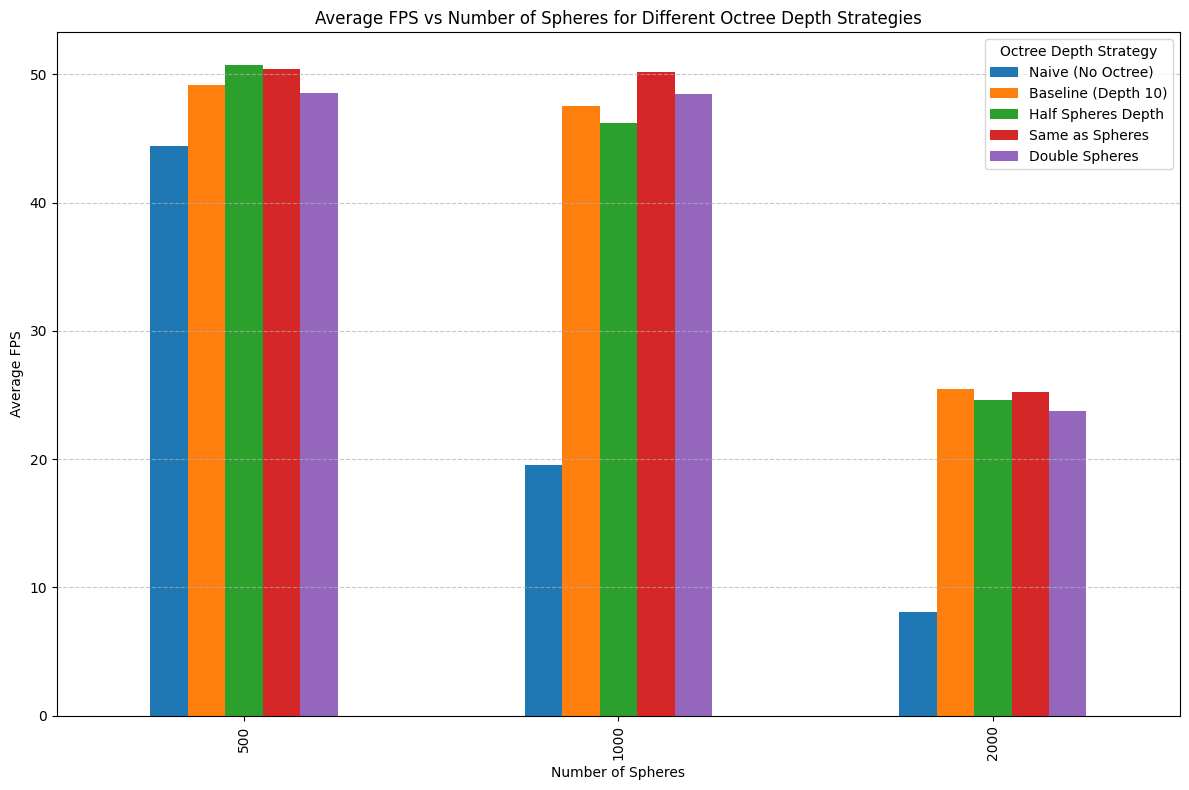

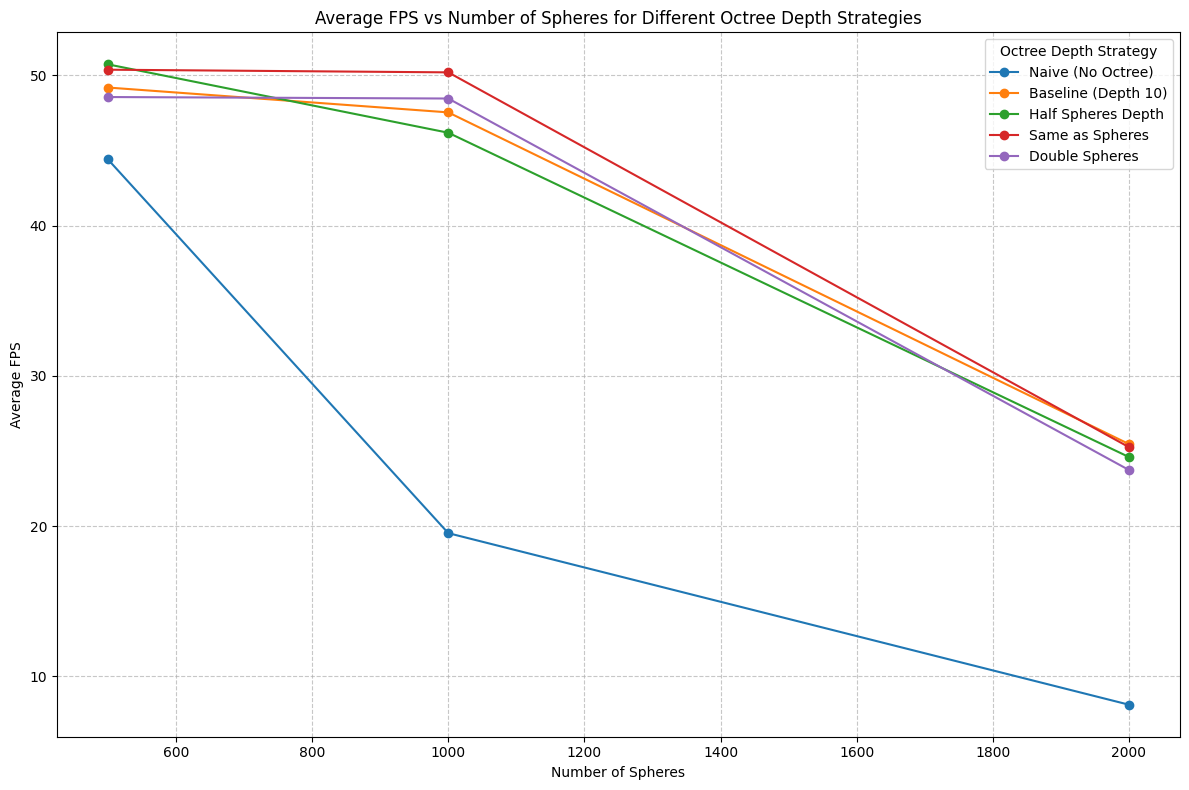

In [ ]:
# Get unique sphere counts for easy calculation
sphere_counts = df_octree['Spheres'].unique()

# Filter data for different octree depths
naive = df[df['Max Octree Depth'] == -1]  # Naive method (no octree)
baseline = df_octree[df_octree['Max Octree Depth'] == 10]  # Baseline octree depth

# Create empty lists to store the data for adaptive depths
half_spheres_fps = []
same_spheres_fps = []
double_spheres_fps = []

# For each sphere count, calculate the corresponding depths and get average FPS
for sphere_count in sphere_counts:
    half_depth = max(1, sphere_count // 2)
    same_depth = sphere_count
    double_depth = sphere_count * 2
    
    # Get FPS for each adaptive depth setting
    half_fps = df_octree[(df_octree['Spheres'] == sphere_count) & 
                         (df_octree['Max Octree Depth'] == half_depth)]['Avg FPS'].mean()
    same_fps = df_octree[(df_octree['Spheres'] == sphere_count) & 
                         (df_octree['Max Octree Depth'] == same_depth)]['Avg FPS'].mean()
    double_fps = df_octree[(df_octree['Spheres'] == sphere_count) & 
                          (df_octree['Max Octree Depth'] == double_depth)]['Avg FPS'].mean()
    
    half_spheres_fps.append(half_fps)
    same_spheres_fps.append(same_fps)
    double_spheres_fps.append(double_fps)

# Create DataFrame with the results
avg_fps_data = pd.DataFrame({
    'Spheres': sphere_counts,
    'Naive (No Octree)': [naive[naive['Spheres'] == spheres]['Avg FPS'].mean() for spheres in sphere_counts],
    'Baseline (Depth 10)': [baseline[baseline['Spheres'] == spheres]['Avg FPS'].mean() for spheres in sphere_counts],
    'Half Spheres Depth': half_spheres_fps,
    'Same as Spheres': same_spheres_fps,
    'Double Spheres': double_spheres_fps
})

# Plot the results
plt.figure(figsize=(12, 8))
avg_fps_data.set_index('Spheres').plot(kind='bar', figsize=(12, 8))
plt.xlabel('Number of Spheres')
plt.ylabel('Average FPS')
plt.title('Average FPS vs Number of Spheres for Different Octree Depth Strategies')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Octree Depth Strategy')
plt.tight_layout()
plt.show()

# Also create a line plot for better trend visualization
plt.figure(figsize=(12, 8))
for column in avg_fps_data.columns:
    if column != 'Spheres':
        plt.plot(avg_fps_data['Spheres'], avg_fps_data[column], marker='o', label=column)
        
plt.xlabel('Number of Spheres')
plt.ylabel('Average FPS')
plt.title('Average FPS vs Number of Spheres for Different Octree Depth Strategies')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Octree Depth Strategy')
plt.tight_layout()
plt.show()


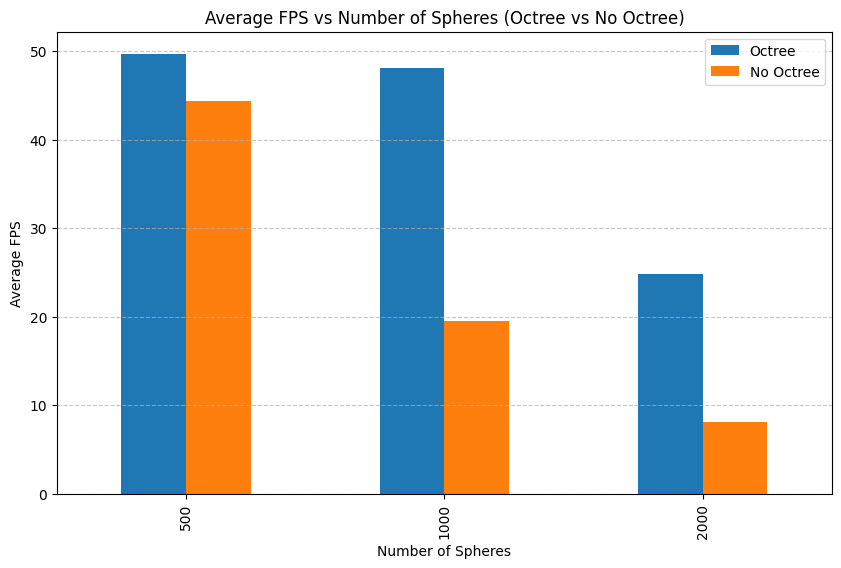

In [14]:
# Create a new DataFrame with the avg FPS for octree and no-octree
comparison_df = pd.DataFrame({
    'Octree': df_octree.groupby('Spheres')['Avg FPS'].mean(),
    'No Octree': df_no_octree.groupby('Spheres')['Avg FPS'].mean()
})

# Plot the grouped bar chart
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Number of Spheres')
plt.ylabel('Average FPS')
plt.title('Average FPS vs Number of Spheres (Octree vs No Octree)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [15]:
print(df_octree['Max Octree Depth'].unique())
print(df_octree['Num Samples'].unique())
print(df_octree['Max Rays Depth'].unique())
print(df_octree['Screen Height'].unique())
no_octree = df_no_octree[df_no_octree['Max Octree Depth'] == -1]
no_octree_4 = no_octree[no_octree['Num Samples'] == 4]
no_octree_4_4 = no_octree_4[no_octree_4['Max Rays Depth'] == 4]
no_octree_4_4_600 = no_octree_4_4[no_octree_4_4['Screen Height'] == 600]
no_octree_4_4_1080 = no_octree_4_4[no_octree_4_4['Screen Height'] == 1080]

octree_1 = df_octree[df_octree['Max Octree Depth'] == 1]
octree_1_4 = octree_1[octree_1['Num Samples'] == 4]
octree_1_4_4 = octree_1_4[octree_1_4['Max Rays Depth'] == 4]
octree_1_4_4_600 = octree_1_4_4[octree_1_4_4['Screen Height'] == 600]

octree_1_4_4_1080 = octree_1_4_4[octree_1_4_4['Screen Height'] == 1080]


[  10  250  500 1000 2000 4000]
[4]
[4]
[600]


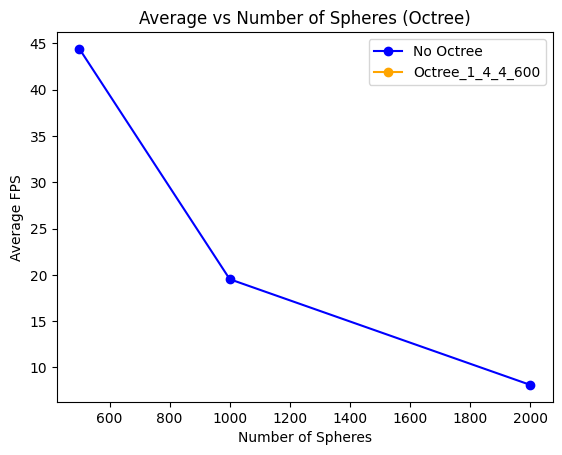

In [16]:
avg_by_spheres = no_octree_4_4_600.groupby('Spheres')['Avg FPS'].mean().reset_index()
avg_by_spheres_octree_1_4_4_600 = octree_1_4_4_600.groupby('Spheres')['Avg FPS'].mean().reset_index()
plt.plot(avg_by_spheres['Spheres'], avg_by_spheres['Avg FPS'], marker='o', label='No Octree', color='blue')
plt.plot(avg_by_spheres_octree_1_4_4_600['Spheres'], avg_by_spheres_octree_1_4_4_600['Avg FPS'], marker='o', label='Octree_1_4_4_600', color='orange')

plt.xlabel('Number of Spheres')
plt.ylabel('Average FPS')
plt.title('Average vs Number of Spheres (Octree)')
plt.legend()
plt.show()

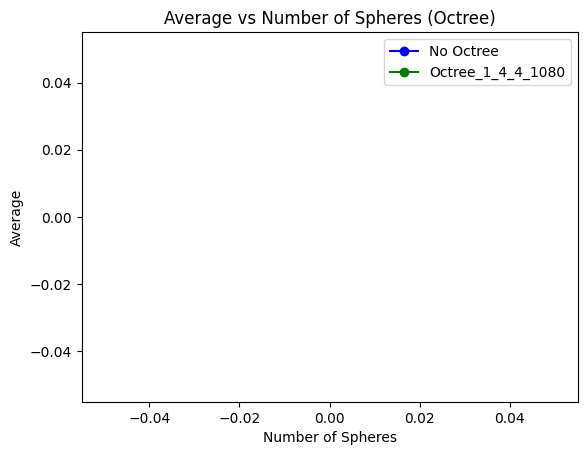

In [17]:
avg_by_spheres = no_octree_4_4_1080.groupby('Spheres')['Avg FPS'].mean().reset_index()
avg_by_spheres_octree_1_4_4_1080 = octree_1_4_4_1080.groupby('Spheres')['Avg FPS'].mean().reset_index()

plt.plot(avg_by_spheres['Spheres'], avg_by_spheres['Avg FPS'], marker='o', label='No Octree', color='blue')
plt.plot(avg_by_spheres_octree_1_4_4_1080['Spheres'], avg_by_spheres_octree_1_4_4_1080['Avg FPS'], marker='o', label='Octree_1_4_4_1080', color='green')

plt.xlabel('Number of Spheres')
plt.ylabel('Average')
plt.title('Average vs Number of Spheres (Octree)')
plt.legend()
plt.show()


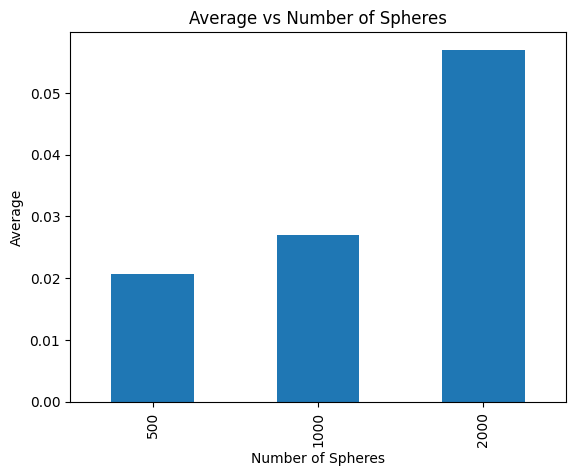

In [18]:
df.groupby('Spheres')['Avg'].mean().plot(kind='bar')
plt.xlabel('Number of Spheres')
plt.ylabel('Average')
plt.title('Average vs Number of Spheres')
plt.show()